In [1]:
### Implement a deep neural network for scene classification.
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
# from keras.initializers import glorot_normal
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix


import tensorflow as tf


In [2]:
train_directory = "C:/Just Some Work/Practice/DeepLearning/Practice5/dataset/train_data"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(150, 150))
val_directory = "C:/Just Some Work/Practice/DeepLearning/Practice5/dataset/val_data"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(150, 150))

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [3]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=[150,150,3], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               22429824  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, batch_size=25, epochs=10, verbose=True, validation_data=val_ds)


Epoch 1/10
439/439 [==============================] - 29s 41ms/step - loss: 71.3171 - accuracy: 0.3581 - val_loss: 1.2312 - val_accuracy: 0.5223

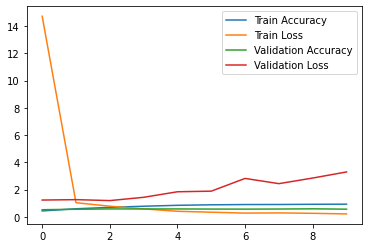

In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [17]:
entries = os.listdir('C:\Just Some Work\Practice\DeepLearning\Practice5\dataset\pred')
for i in entries:
    image = tf.keras.preprocessing.image.load_img("C:/Just Some Work/Practice/DeepLearning/Practice5/dataset/pred/" + i)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    print(np.argmax(predictions))


4
0
1
2
3
5
0
4
0
2
3
4
0
4
1
5
2
5
5
4
